<a href="https://colab.research.google.com/github/vloneonme/trew/blob/main/vipsa_lr5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

In [12]:
df = pd.read_csv('vipsa-db-lr5.csv', sep=';', decimal=',')
y = df['y1']
x4 = df['x4']
x6 = df['x6']
x8 = df['x8']
x11 = df['x11']
x13 = df['x13']
X = df[['x4', 'x6', 'x8', 'x11', 'x13']]

In [103]:
#proverka na normal'nost'
[print(f"{col}: {stats.shapiro(df[col])[1]}") for col in ['x4', 'x6', 'x8', 'x11', 'x13']]
print("дисперсия\n", df[['x4', 'x6', 'x8', 'x11', 'x13']].var())

x4: 0.7017825901628397
x6: 0.6427132042002136
x8: 0.08086149889565354
x11: 0.0029496924242106413
x13: 0.0015661787350361464
дисперсия
 x4     7.383333e-03
x6     2.087900e-02
x8     2.164957e-01
x11    1.160527e+08
x13    4.295066e+08
dtype: float64


In [84]:
print("Дисперсии X:", df[['x4', 'x6', 'x8', 'x11', 'x13']].var().round(3))

Дисперсии X: x4     7.000000e-03
x6     2.100000e-02
x8     2.160000e-01
x11    1.160527e+08
x13    4.295066e+08
dtype: float64


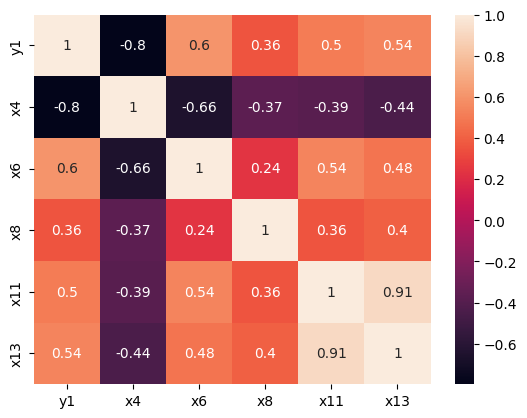

In [106]:
#tut korrelyatsionniy analiz
corr_matrix = pd.concat([y, X], axis=1).corr(method='spearman')
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [121]:
import statsmodels.formula.api as smf

model = smf.ols('y ~ x4 + x6 + x8 + x11 + x13', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     11.18
Date:                Sun, 07 Dec 2025   Prob (F-statistic):           3.94e-05
Time:                        20:49:14   Log-Likelihood:                -36.613
No. Observations:                  25   AIC:                             85.23
Df Residuals:                      19   BIC:                             92.54
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.1153      1.903      5.315      0.0

In [122]:
model = smf.ols('y ~ x4 + x11', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     28.63
Date:                Sun, 07 Dec 2025   Prob (F-statistic):           7.53e-07
Time:                        20:49:15   Log-Likelihood:                -37.733
No. Observations:                  25   AIC:                             81.47
Df Residuals:                      22   BIC:                             85.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9067      1.254      9.493      0.0

In [128]:
pca = PCA()
X_pca = pca.fit_transform(StandardScaler().fit_transform(df[['x4','x6','x8','x11','x13']]))
print(f"объясненная дисперси: {pca.explained_variance_ratio_}")
print(f"Выживут: {sum(np.cumsum(pca.explained_variance_ratio_) < 0.8)+1}")

дисперсии: [0.64019183 0.16294434 0.12720696 0.06410885 0.00554803]
Выживут: 2


In [127]:
pca = PCA()
X_pca = pca.fit_transform(StandardScaler().fit_transform(df[['x4','x6','x8','x11','x13']]))
print(f"Объясненная дисперсия: {pca.explained_variance_ratio_}")
print(f"Рекомендуемое число компонент: {sum(np.cumsum(pca.explained_variance_ratio_) < 0.7)+1}")

Объясненная дисперсия: [0.64019183 0.16294434 0.12720696 0.06410885 0.00554803]
Рекомендуемое число компонент: 2


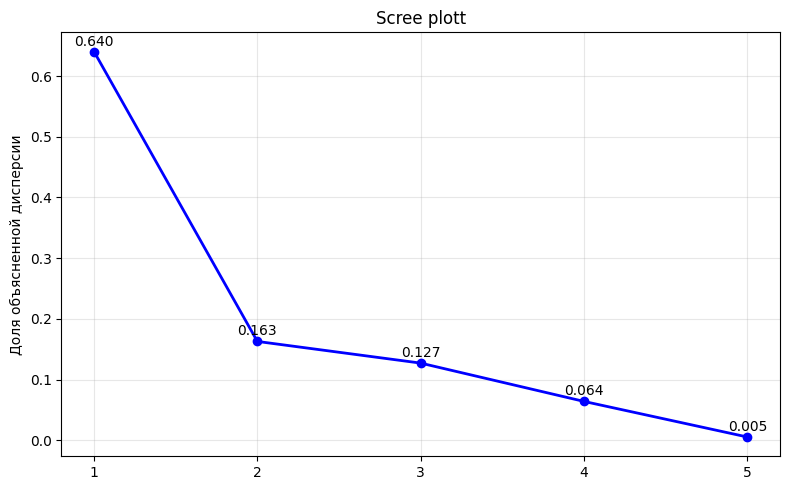

In [136]:
import matplotlib.pyplot as plt
import numpy as np

# Данные
explained = [0.6402, 0.1629, 0.1272, 0.0641, 0.0055]
components = range(1, 6)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(components, explained, 'bo-', linewidth=2)
plt.ylabel('Доля объясненной дисперсии')
plt.title('Scree plott')
plt.xticks(components)
plt.grid(True, alpha=0.3)

# Подписи значений
for i, v in enumerate(explained):
    plt.text(i+1, v+0.01, f'{v:.3f}', ha='center')


plt.tight_layout()
plt.show()

In [144]:
qwe = pca.explained_variance_
print("Собственные значения:", qwe)
kaiser_k = sum(qwe > 1)
print(f"\по критерию Кайзера выживет {kaiser_k}")


Собственные значения: [3.33433245 0.84866841 0.66253624 0.33390025 0.02889598]
\по критерию Кайзера выживет 1


In [77]:
print("Мультиколлинеарность признаков:")
X_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Признак"] = X_const.columns
vif_data["млтклнрнст"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
vif_data = vif_data[vif_data["Признак"] != "const"]
print(vif_data.round(2))

Мультиколлинеарность признаков:
  Признак  млтклнрнст
1      x4        1.91
2      x6        2.17
3      x8        1.36
4     x11       18.90
5     x13       17.93


In [78]:
print("Мультиколлинеарность признаков после удаления:")
X_new = X.drop(columns=['x13'])
X_new_const = sm.add_constant(X_new)
vif_data_new = pd.DataFrame()
vif_data_new["Признак"] = X_new_const.columns
vif_data_new["млтклнрнст"] = [variance_inflation_factor(X_new_const.values, i) for i in range(X_new_const.shape[1])]
vif_data_new = vif_data_new[vif_data_new["Признак"] != "const"]
print(vif_data_new.round(2))

Мультиколлинеарность признаков после удаления:
  Признак  млтклнрнст
1      x4        1.85
2      x6        2.12
3      x8        1.36
4     x11        1.95
